[5. +0.j         0.5+0.18198512j 0.5+0.41954982j 0.5+0.8660254j
 0.5+2.83564091j 0.5-2.83564091j 0.5-0.8660254j  0.5-0.41954982j
 0.5-0.18198512j]
[5. +0.j         0.5+0.18198512j 0.5+0.41954982j 0.5+0.8660254j
 0.5+2.83564091j 0.5-2.83564091j 0.5-0.8660254j  0.5-0.41954982j
 0.5-0.18198512j]
mine= [1 0 1 0 1 0 1 0 1]
standard= [1 0 1 0 1 0 1 0 1]
i amm here [5.         0.53208889 0.65270364 1.         2.87938524 2.87938524
 1.         0.65270364 0.53208889]


<ipython-input-22-f2a9d364f03f>:30: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.round(input_data).astype(int)
<ipython-input-22-f2a9d364f03f>:36: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.round(inv_vector).astype(int)


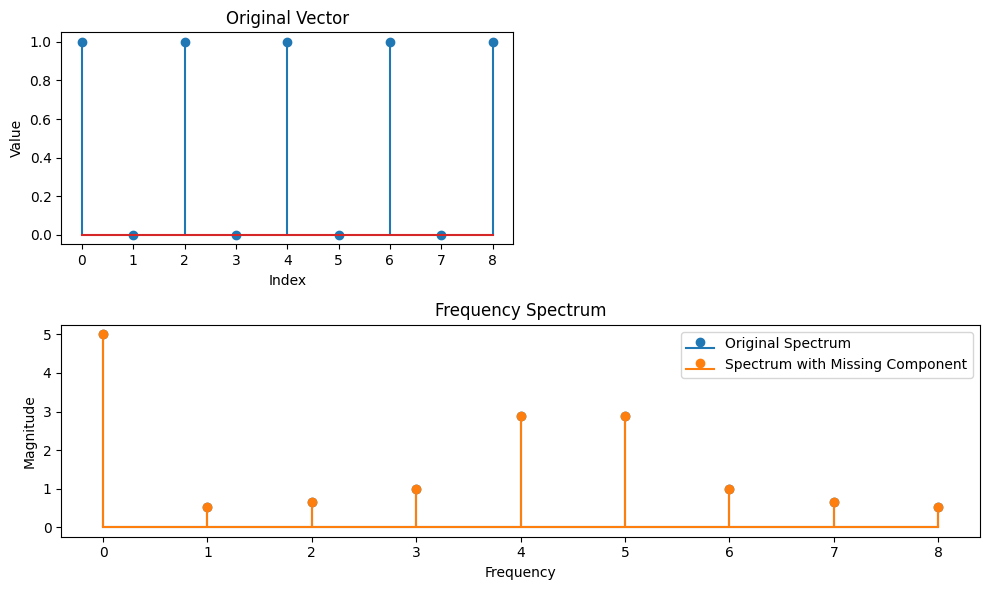

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def fourier_transform_mine(input_stream):
    #input_data=np.frombuffer(input_stream, dtype=np.uint16)
    n=len(input_stream)

    coefficients=np.zeros(n, dtype=np.complex_)

    for k in range(n):
        for j in range(n):
            coefficients[k]+=input_stream[j]*np.exp(-2j*np.pi*k*j/n)
    #print("mine=",coefficients)
    return coefficients

def fourier_transform(vector): #standard one
    n = len(vector)
    complex_coeffs = np.fft.fft(vector)
    #print("standard=",complex_coeffs)
    return complex_coeffs

def inverse_fourier_transform_mine(coefficients):
    n=len(coefficients)
    #n=12
    input_data=np.zeros(n, dtype=np.complex_)
    for j in range(n):
        for k in range(n):
            input_data[j]+=coefficients[k]*np.exp(2j*np.pi*k*j/n)
    input_data/=n
    return np.round(input_data).astype(int)

def inverse_fourier_transform(complex_coeffs): #standard one
    #print("missing complex coefficient", complex_coeffs)
    inv_vector = np.fft.ifft(complex_coeffs)
    #print("recons",inv_vector)
    return np.round(inv_vector).astype(int)

v = [1,0,1,0,1,0,1,0,1]
t = fourier_transform_mine(v)
q = fourier_transform(v)
print(t)
print(q)
print("mine=",inverse_fourier_transform_mine(t))
print("standard=",inverse_fourier_transform(q))
print("i amm here", np.abs(q))

#Plot original vector and reconstructed vector
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.stem(v)
plt.title("Original Vector")
plt.xlabel("Index")
plt.ylabel("Value")

# plt.subplot(2, 2, 2)
# plt.stem(reconstructed_v.tolist())
# plt.title("Reconstructed Vector")
# plt.xlabel("Index")
# plt.ylabel("Value")

# # Plot frequency spectrum
plt.subplot(2, 1, 2)
plt.stem(np.abs(q), markerfmt="C0o", linefmt="C0-", basefmt="C0-")
plt.stem(np.abs(t), markerfmt="C1o", linefmt="C1-", basefmt="C1-")
plt.legend(["Original Spectrum", "Spectrum with Missing Component"])
plt.title("Frequency Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()